In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [8]:
zoo=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
zoo.shape

(101, 18)

In [10]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
x=zoo.iloc[:,1:]
y=zoo.iloc[:,1]

In [12]:
kf=KFold(n_splits=5)
kn=KNeighborsClassifier(n_neighbors=15)
result=cross_val_score(kn,x,y,cv=kf)
print(result*100)

[95.23809524 90.         95.         95.         90.        ]


In [15]:
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)
kn2=KNeighborsClassifier()
gs=GridSearchCV(kn2,param_grid)
gs.fit(x,y)
y_pred=gs.predict(x)
print(classification_report(y,y_pred))
print(gs.best_params_,gs.best_estimator_)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        43

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101

{'n_neighbors': 2} KNeighborsClassifier(n_neighbors=2)


In [17]:
k_range=range(1,30)
k_score=[]
for k in k_range:
  kn3=KNeighborsClassifier(n_neighbors=k)
  result2=cross_val_score(kn3,x,y,cv=kf,scoring="accuracy")
  k_score.append(result2.mean())

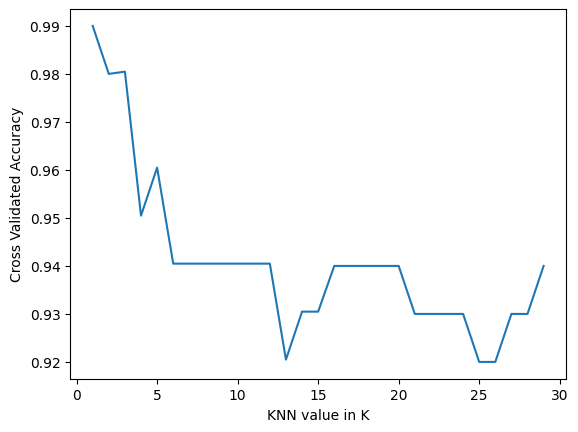

In [18]:
plt.plot(k_range,k_score)
plt.xlabel("KNN value in K")
plt.ylabel("Cross Validated Accuracy")
plt.show()

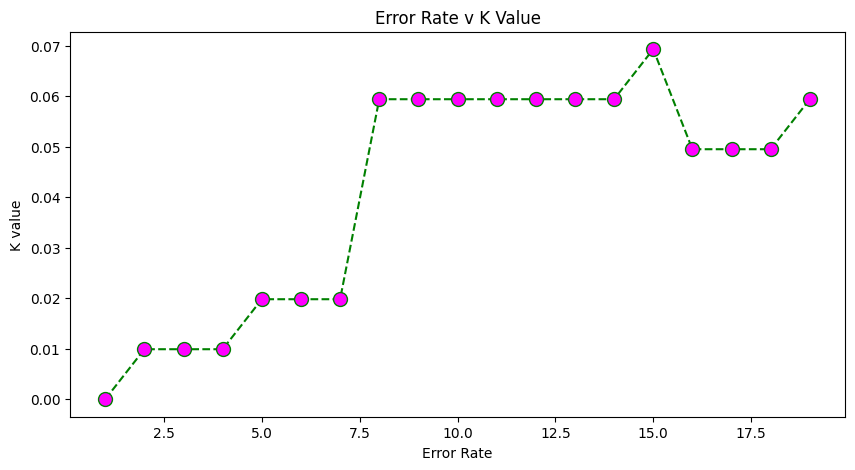

In [20]:
plt.figure(figsize=(10,5))
error_rate=[]
for i in range(1,20):
  kn4=KNeighborsClassifier(n_neighbors=i)
  kn4.fit(x,y)
  i_pred=kn4.predict(x)
  error_rate.append(np.mean(i_pred!=y))

plt.plot(range(1,20),error_rate,color="green",linestyle="dashed",marker="o",markerfacecolor="magenta",markersize=10)
plt.title("Error Rate v K Value")
plt.xlabel("Error Rate")
plt.ylabel("K value")
plt.show()